In [1]:
import tensorflow as tf
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
from siamnet import api

In [3]:
save_path = '../data_omniglot/'

In [4]:
with open(os.path.join(save_path,"train.pickle"), "rb") as file:
    imgs_train = pickle.load(file)

In [5]:
with open(os.path.join(save_path,"val.pickle"), "rb") as file:
    imgs_validate = pickle.load(file)

In [6]:
tf.reset_default_graph()

In [7]:
img1 = tf.placeholder(tf.float32, shape=[None, 105, 105, 1])
img2 = tf.placeholder(tf.float32, shape=[None, 105, 105, 1])
target_diff = tf.placeholder(tf.float32, shape=[None,1])

In [8]:
net = api.siamnet(img1,img2,target_diff,"siam1")

In [15]:
net.train(imgs_train,trainsteps=20,printstep=5)

INFO:tensorflow:Restoring parameters from ./checkpoints/siam1-19
Model restored, step = 20
Step 24: Train loss 0.107
Step 29: Train loss 0.103
Step 34: Train loss 0.106
Step 39: Train loss 0.104


In [13]:
ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))

## compare image 0 to images 15-19 and find closest match

In [16]:
num_compare = 5

In [17]:
find_img = 127

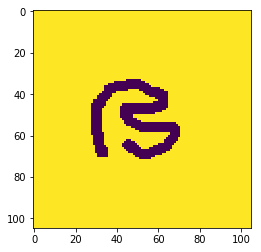

In [18]:
plt.imshow(imgs_validate[find_img,0,:,:])
plt.show()

In [19]:
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, ckpt.model_checkpoint_path)
    diff_val=np.zeros([imgs_validate.shape[0],num_compare])
    for i in range(imgs_validate.shape[0]):
        for j in range(20-num_compare,20):
            diff_val[i][j-20+num_compare] = sess.run(net.results_diff, feed_dict={
                net.img1: np.reshape(imgs_validate[find_img,0,:,:],[1,105,105,1]),
                net.img2: np.reshape(imgs_validate[i,j,:,:],[1,105,105,1])})

INFO:tensorflow:Restoring parameters from checkpoints/siam1-19


In [ ]:
closest_match = np.argmin(np.mean(diff_val,1))
print(closest_match)

In [ ]:
print(diff_val[find_img])
print(diff_val[closest_match])

In [ ]:
fig, ax = plt.subplots(3,num_compare,figsize=(20,10))
ax[0,0].imshow(imgs_validate[find_img,0,:,:])
for i in range(20-num_compare,20):
    ax[1,i-20+num_compare].imshow(imgs_validate[find_img,i,:,:])
    ax[2,i-20+num_compare].imshow(imgs_validate[closest_match,i,:,:])  
plt.show()